### NOTE: Neither the lines of code nor text have been proofread and some of the writing have been taken directly from the OpenCV documentation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Contours

**Getting Started**

These can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition. In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

We'll start with finding contours in a white rectangle against a black background.

In [2]:
# Background
background = np.zeros((400,400,3), np.uint8)  # rows, cols, ch

# Colour for rectangle
WHITE = (255, 255, 255)

# Coordinates of points
p0 = 100, 100  # col, row of top left
p1 = 300, 300  # col, row of bottom right

cv.rectangle(background, p0, p1, WHITE, cv.FILLED)

cv.imshow('rectangle', background)
cv.waitKey(0)
cv.destroyAllWindows()

Let's save this.

In [10]:
cv.imwrite('bank_images/test10.png', background)

True

In OpenCV, we use <code>findContours()</code>. (And from here on, we will view with Matplotlib rather <code>cv.imshow</code>.)

(<matplotlib.image.AxesImage at 0x183824cbec8>, ([], []), ([], []))

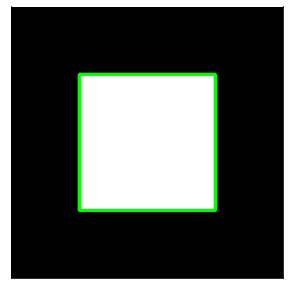

In [9]:
# Read image file whose contours are to be searched for (must be read grayscale)
img = cv.imread('bank_images/test10.png', cv.IMREAD_GRAYSCALE)

# Apply thresholding (this converts the image to a binary image)
ret, thresh = cv.threshold(img, 127, 255, 0)

# Find contours (You now only need two variables for tuple unpacking)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# To see the contours drawn, you may need to (re)convert back to color
color = cv.cvtColor(img, cv.COLOR_GRAY2RGB)  # 'RGB' is the system Matplotlib uses for color

# Draw contours
cv.drawContours(color, contours, -1, (0,255,0), 3)

# View on Matplotlib
plt.figure(figsize=(6,5))
plt.imshow(color), plt.xticks([]), plt.yticks([])

**Features**

***Moments***

This is the weighted average of an image pixels' intensities (or a function of it). Image properties that are found via image moments include *area*, *centroid*, and *orientation*. We use <code>cv.moments()</code> to calculate the moments for the *binary* image we created from our initial image earlier

In [10]:
cv.moments(thresh)

{'m00': 10302255.0,
 'm10': 2060451000.0,
 'm01': 2060451000.0,
 'm20': 446774458500.0,
 'm11': 412090200000.0,
 'm02': 446774458500.0,
 'm30': 103228595100000.0,
 'm21': 89354891700000.0,
 'm12': 89354891700000.0,
 'm03': 103228595100000.0,
 'mu20': 34684258500.0,
 'mu11': 0.0,
 'mu02': 34684258500.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.00032678929677693546,
 'nu11': 0.0,
 'nu02': 0.00032678929677693546,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

The function returns a dictionary containing three different types of moments, *spatial*, *central*, and *central normalised*. These different moments are identified as so:

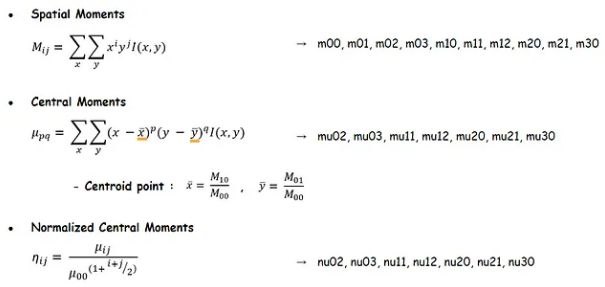

Checking the number of values in the dictionary

In [11]:
len(cv.moments(thresh))

24

Now our image is a rectangle, which is quite an easy one to visualise without the code above, but let's see how it works with it; first, calculate the coordinates for the centroid point

Text(205, 200, '(200, 200)')

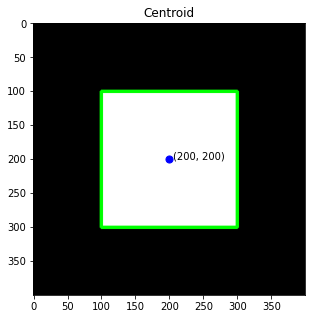

In [16]:
moments = cv.moments(thresh)
cx = int(moments['m10']/moments['m00'])
cy = int(moments['m01']/moments['m00'])

# View on Matplotlib
plt.figure(figsize=(6,5))
plt.imshow(color), plt.scatter([cx], [cy], c='b', s=50), plt.title('Centroid')
plt.text(205, cy, '('+ str(cx) + ', ' + str(cy) + ')')

Finding the centroid of the above image is simple as it contains just one object, but what if there are multiple? In that case, we will have to find the number of contours in the image and find the center of each of them. Let us see how it works!

We will start with a simple multi-blob image before moving on to a more complicated one; first, the simple one:

(<matplotlib.image.AxesImage at 0x18385fba208>, ([], []), ([], []))

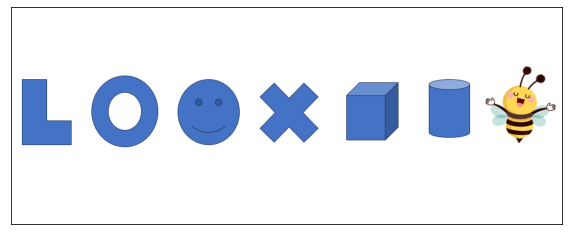

In [76]:
img = cv.imread('bank_images/test12.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,4))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x18388ad9fc8>, ([], []), ([], []))

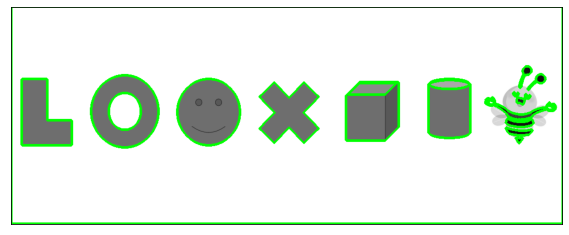

In [77]:
# Convert color image to grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Convert to binary image
ret, thresh = cv.threshold(gray_img, 127, 255, 0)

# Find contours
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# (Re)convert back to color
color = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)  # 'RGB' is the system Matplotlib uses for color

# Draw contours
cv.drawContours(color, contours, -1, (0,255,0), 3)

# View on Matplotlib
plt.figure(figsize=(10,4))
plt.imshow(color), plt.xticks([]), plt.yticks([])

Notice, not all the contours were drawn for the wasp—the wing boundaries were missed (but interestingly, the body features were picked; we don't really need these for this analysis); this is due to the threshold settings; we can amend that

(<matplotlib.image.AxesImage at 0x183884a8c08>, ([], []), ([], []))

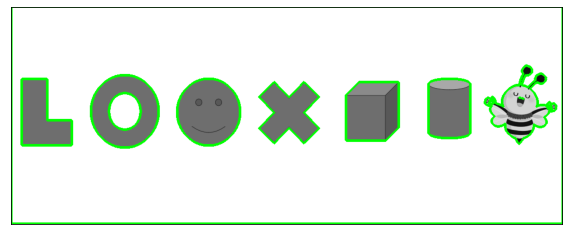

In [83]:
ret, thresh = cv.threshold(gray_img, 250, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
color = cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR)  # 'RGB' is the system Matplotlib uses for color
cv.drawContours(color, contours, -1, (0,255,0), 3)

# View on Matplotlib
plt.figure(figsize=(10,4))
plt.imshow(color), plt.xticks([]), plt.yticks([])

Now because we are dealing with multiple objects, rather than use *thresh* to find the centroids, we will use *contours*

(<matplotlib.image.AxesImage at 0x18388e1af88>,
 Text(0.5, 1.0, 'Centroids'))

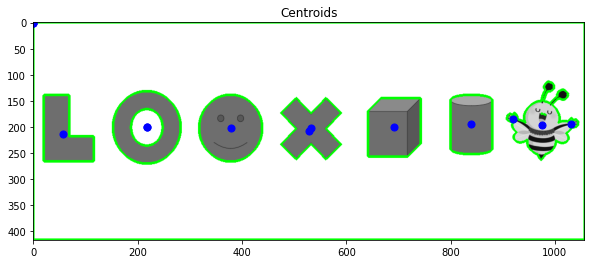

In [84]:
x_coords = []
y_coords = []

for c in contours:
    try:
        M = cv.moments(c)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
    except:
        cx = 0
        cy = 0
    x_coords.append(cx)
    y_coords.append(cy)
    
# View on Matplotlib
plt.figure(figsize=(10,4))
plt.imshow(color), plt.scatter(x_coords, y_coords, c='b', s=50), plt.title('Centroids')

Notice the multiple moments obtained for the wasp although we can agree that its central one is the dominant one; let us get the coordinates of each centroid

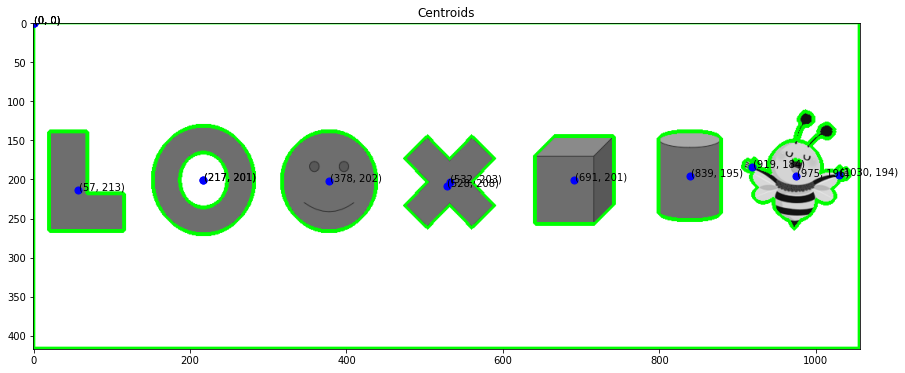

In [85]:
plt.figure(figsize=(15,6))
plt.imshow(color), plt.scatter(x_coords, y_coords, c='b', s=50), plt.title('Centroids')
xy = list(zip(x_coords, y_coords))
for i in xy:
    plt.text(i[0]+1, i[1], '('+ str(i[0]) + ', ' + str(i[1]) + ')')

The doughnut ring has two identical centroids (one for the inner and outer contours respectively) and the 'X' also has two, one of which is the centroid for the green boundary of all the images; we can tidy this slightly

In [98]:
xy

[(528, 208),
 (691, 201),
 (532, 203),
 (839, 195),
 (378, 202),
 (57, 213),
 (217, 201),
 (217, 201),
 (975, 196),
 (1030, 194),
 (919, 184),
 (0, 0),
 (0, 0),
 (0, 0)]

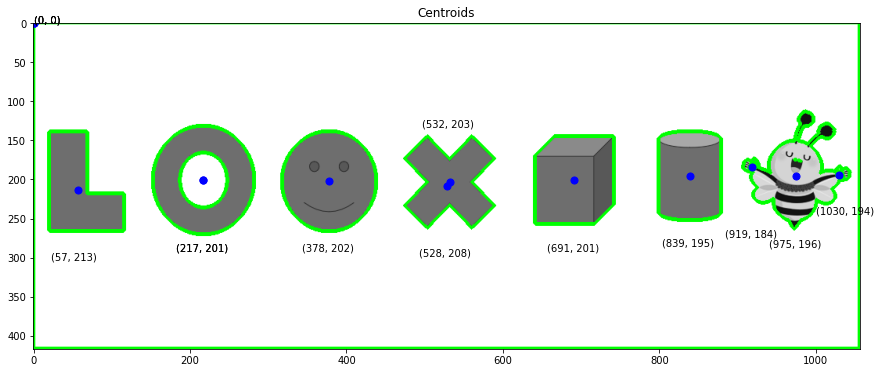

In [97]:
plt.figure(figsize=(15,6))
plt.imshow(color), plt.scatter(x_coords, y_coords, c='b', s=50), plt.title('Centroids')
xy = list(zip(x_coords, y_coords))
for i in xy:
    if i == (0,0):
        plt.text(i[0], i[1], '('+ str(i[0]) + ', ' + str(i[1]) + ')')
    elif i == (1030,194):
        plt.text(i[0]-30, i[1]+50, '('+ str(i[0]) + ', ' + str(i[1]) + ')')
    elif i == (532, 203):
        plt.text(i[0]-35, i[1]-70, '('+ str(i[0]) + ', ' + str(i[1]) + ')')
    else:
        plt.text(i[0]-35, i[1]+90, '('+ str(i[0]) + ', ' + str(i[1]) + ')')

An indication of how complicated, moment calculations can be for multi-object images, but these are important in *image segmentation*. Another important tool in segmentation alongside contours and moments are *color spaces*, which I've already looked at. Color spaces can, however, have their limitations because at times, it is simply not possible to isolate an object 'cleanly' based on its color(s), especially if the different parts of the object have different degrees of lighting (as I found out in *6A_ImageProcessing_p3_Supplementary*), so being able to use a variety of tools for segmentation is really valuable. Image segmentation is very important because it underpins *object detection*, a key part of computer vision (especially where machine learning is involved).

Let us now look at a more complicated, but realistic image

(<matplotlib.image.AxesImage at 0x14da8987408>, ([], []), ([], []))

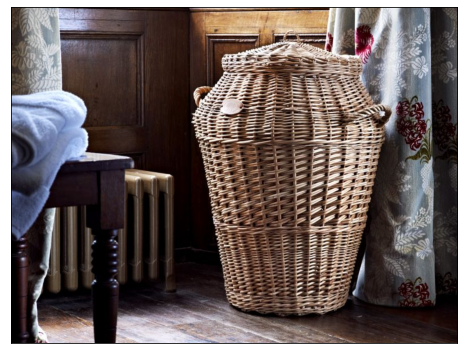

In [7]:
img = cv.imread('bank_images/test11.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(8,7))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14da89d3788>, ([], []), ([], []))

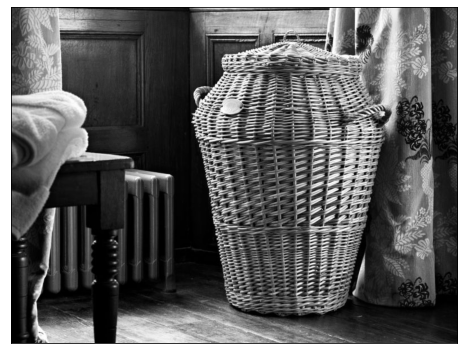

In [8]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# View on Matplotlib
plt.figure(figsize=(8,7))
plt.imshow(gray_img, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14da8a4d108>, ([], []), ([], []))

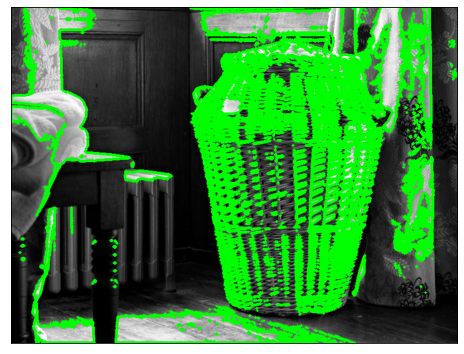

In [9]:
ret, thresh = cv.threshold(gray_img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
gray4plt = cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB)  # 'RGB' is the system Matplotlib uses for color
cv.drawContours(gray4plt, contours, -1, (0,255,0), 3)

# View on Matplotlib
plt.figure(figsize=(8,7))
plt.imshow(gray4plt), plt.xticks([]), plt.yticks([])

Many contours have been missed; hence, the threshold settings need to be adjusted

(<matplotlib.image.AxesImage at 0x14da8a13048>, ([], []), ([], []))

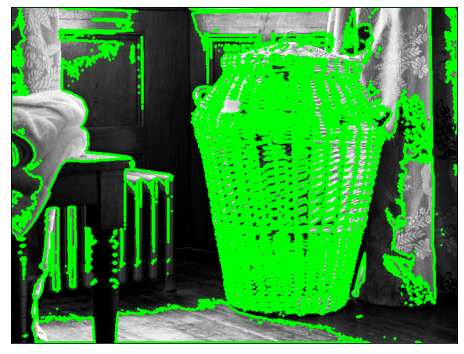

In [10]:
ret, thresh = cv.threshold(gray_img, 70, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
gray4plt = cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB)  # 'RGB' is the system Matplotlib uses for color
cv.drawContours(gray4plt, contours, -1, (0,255,0), 3)

# View on Matplotlib
plt.figure(figsize=(8,7))
plt.imshow(gray4plt), plt.xticks([]), plt.yticks([])

Not perfect, but will do for now. Note that the direction of the light is having a significant effect on *where* the contours lines are being drawn

(<matplotlib.image.AxesImage at 0x14da9610188>,
 Text(0.5, 1.0, 'Centroids'))

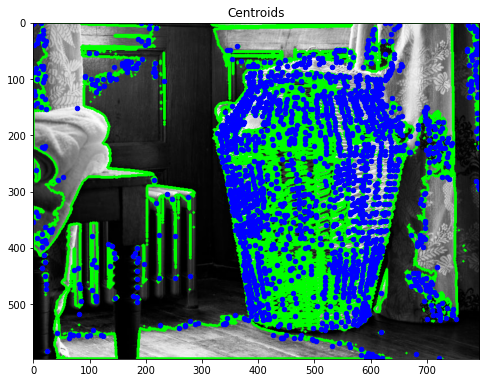

In [12]:
x_coords = []
y_coords = []

for c in contours:
    try:
        M = cv.moments(c)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
    except:
        cx = 0
        cy = 0
    x_coords.append(cx)
    y_coords.append(cy)
    
# View on Matplotlib
plt.figure(figsize=(8,7))
plt.imshow(gray4plt), plt.scatter(x_coords, y_coords, c='b', s=20), plt.title('Centroids')

A truly complicated picture! I won't display the coordinates of each centroid, but what I would say is that the above information allows us to give *meaning* to a collection of centroids to our computer. So, if we inform our machine that (x,y) coordinates within a certain range correspond to the basket in the image, then given the concentration and pattern of those centroids, the computer could *learn* the pattern and eventually associate such pattern, not just to a basket, but to a particular type of basket. I will return to this idea later although I will say for now that such learning process is actually quite complicated to do (more on that much later).

Moments are not the only things contours help us with; they also help with *area* (<code>cv.counterArea(c)</code>) and *perimeter* (<code>cv.arcLength(c,<strong><font color="green">True</font></strong>)</code>, where the second argument pertains to whether the contour is closed or not)

***Approximation***

Approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of <a href="https://en.wikipedia.org/wiki/Ramer%E2%80%93Douglas%E2%80%93Peucker_algorithm">Douglas-Peucker</a> algorithm.

To understand this, suppose you are trying to find a square in an image, but due to some problems in the image, you didn't get a perfect square, but a "bad shape" (As shown in first image below). Now you can use this function to approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.

<code>epsilon = 0.1*cv.arcLength(cnt,<strong><font color="green">True</font></strong>)</code>
<br>
<code>approx = cv.approxPolyDP(cnt,epsilon,<strong><font color="green">True</font></strong>)</code>

Below, in second image, green line shows the approximated curve for epsilon = 10% of arc length. Third image shows the same for epsilon = 1% of the arc length. Third argument specifies whether curve is closed or not.

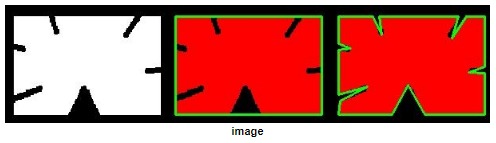

***Convex Hull***

Looks like *approximation* but is not (although might give the same results in some cases. Here, <code>cv.convexHull()</code> function checks a curve for convexity defects and corrects it. Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called *convexity defects*. For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours.

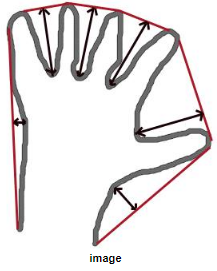

Let's demonstrate the use of the *convexHull()* function with three cars in the cartoon below

(<matplotlib.image.AxesImage at 0x14daddd5f88>, ([], []), ([], []))

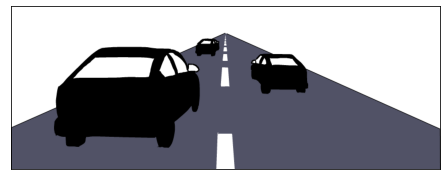

In [43]:
img = cv.imread('bank_images/test13_adaptation_extract.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(9,3))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])


(<matplotlib.image.AxesImage at 0x14dade83d88>, ([], []), ([], []))

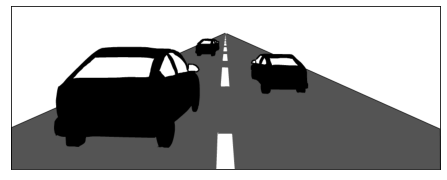

In [45]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# View on Matplotlib
plt.figure(figsize=(9,3))
plt.imshow(gray_img, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dadf6c8c8>, ([], []), ([], []))

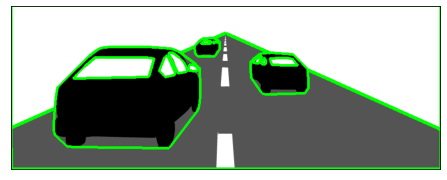

In [48]:
ret, thresh = cv.threshold(gray_img, 50, 200, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
gray4plt = cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB)

for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    cv.drawContours(gray4plt, [hull], -1, (0,255,0), 3)

# View on Matplotlib
plt.figure(figsize=(9,3))
plt.imshow(gray4plt), plt.xticks([]), plt.yticks([])

Convex hulls have several useful applications:

<ul>
    <li>Collision detection or avoidance</li>
    <li>Face Swap</li>
    <li>Shape analysis</li>
</ul>

For more on convex hulls, see:
<br>
https://theailearner.com/2019/12/05/finding-convex-hull-opencv-python/
<br>
https://docs.opencv.org/3.4/dd/d49/tutorial_py_contour_features.html

Following on the theme, are ***bounding rectangles*** and ***enclosing circles***

*Straight Bounding Rectangle*

(<matplotlib.image.AxesImage at 0x14dc2dea5c8>, ([], []), ([], []))

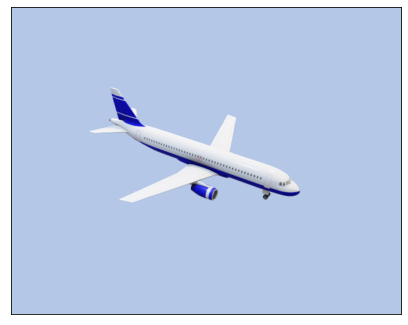

In [277]:
img = cv.imread('bank_images/test14.png')

# View on Matplotlib
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc2e1ff08>, ([], []), ([], []))

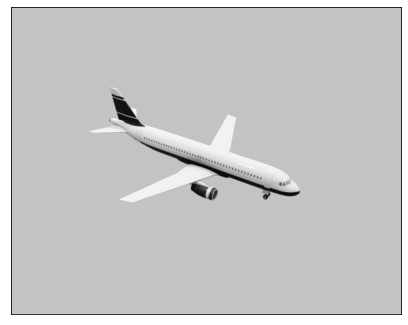

In [278]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_img, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc2e78388>, ([], []), ([], []))

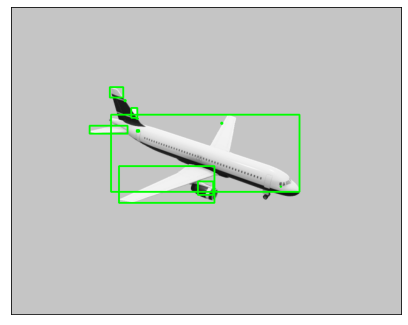

In [279]:
ret, thresh = cv.threshold(gray_img, 200, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
gray4plt = cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB)

for i in range(len(contours)):
    x,y,w,h = cv.boundingRect(contours[i])
    cv.rectangle(gray4plt, (x,y), (x+w,y+h), (0,255,0), 2)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray4plt), plt.xticks([]), plt.yticks([])

If I shade the entire plane the same color (black)

(<matplotlib.image.AxesImage at 0x14dc2ecbd08>, ([], []), ([], []))

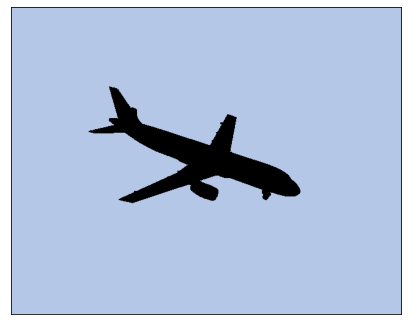

In [280]:
lower_end = np.array([[[231, 199, 180]]])
upper_end = np.array([[[231, 199, 180]]])

mask = cv.inRange(img, lower_end, upper_end)

res = cv.bitwise_and(img,img, mask= mask)

rgb_res = cv.cvtColor(res, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_res), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc3ef4748>, ([], []), ([], []))

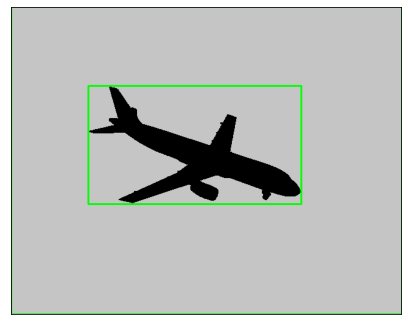

In [281]:
gray_res = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray_res, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
gray_res4plt = cv.cvtColor(gray_res, cv.COLOR_GRAY2RGB)

for i in range(len(contours)):
    x,y,w,h = cv.boundingRect(contours[i])
    cv.rectangle(gray_res4plt, (x,y), (x+w,y+h), (0,255,0), 2)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_res4plt), plt.xticks([]), plt.yticks([])

<br>
<br>

*Rotated Rectangle*

(<matplotlib.image.AxesImage at 0x14dc3f33088>, ([], []), ([], []))

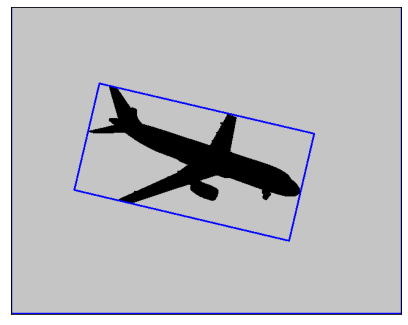

In [282]:
gray_res4plt = cv.cvtColor(gray_res, cv.COLOR_GRAY2RGB)
for i in range(len(contours)):
    rect = cv.minAreaRect(contours[i])
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(gray_res4plt,[box],0,(0,0,255),2)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_res4plt), plt.xticks([]), plt.yticks([])

<br>
<br>

*Minimum Enclosing Circle*

(<matplotlib.image.AxesImage at 0x14dc3f88a88>, ([], []), ([], []))

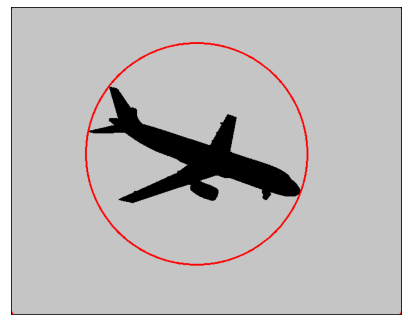

In [283]:
gray_res4plt = cv.cvtColor(gray_res, cv.COLOR_GRAY2RGB)
for i in range(len(contours)):
    (x,y),radius = cv.minEnclosingCircle(contours[i])
    center = (int(x),int(y))
    radius = int(radius)
    cv.circle(gray_res4plt,center,radius,(255,0,0),2)
    
# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_res4plt), plt.xticks([]), plt.yticks([])

<br>
<br>

*Fitting an Ellipse*

(<matplotlib.image.AxesImage at 0x14dc3fc4208>, ([], []), ([], []))

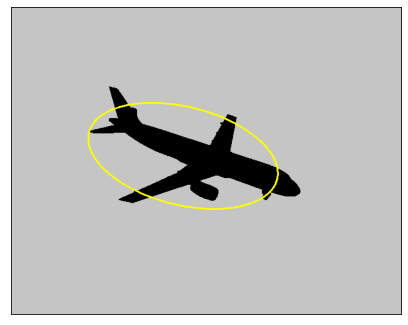

In [284]:
gray_res4plt = cv.cvtColor(gray_res, cv.COLOR_GRAY2RGB)

ellipse = cv.fitEllipse(contours[1]) # Avoid for loop if possible as this also fits an ellipse
                                     # on the rectangular image frame
cv.ellipse(gray_res4plt,ellipse,(255,255,0),2)
    
# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_res4plt), plt.xticks([]), plt.yticks([])

<br>
<br>

*Fitting a Line*

(<matplotlib.image.AxesImage at 0x14dc402cf88>, ([], []), ([], []))

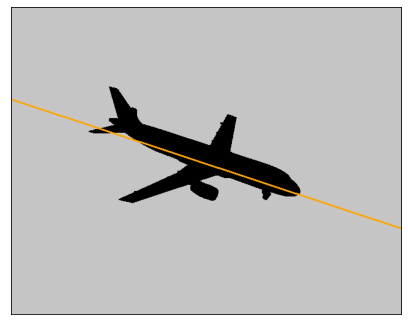

In [285]:
gray_res4plt = cv.cvtColor(gray_res, cv.COLOR_GRAY2RGB)

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(contours[1], cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(gray_res4plt,(cols-1,righty),(0,lefty),(255,165,0),2)
    
# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_res4plt), plt.xticks([]), plt.yticks([])

<br>
<br>

**Properties**

***Extreme Points***

Let us show a demonstration, still using our aeroplane example

(<matplotlib.image.AxesImage at 0x14dc4057648>, ([], []), ([], []))

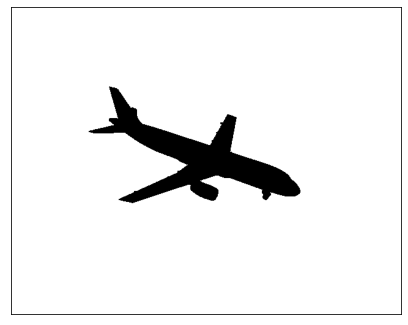

In [286]:
gray_res = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray_res, 127, 255, 0)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_res, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc40b90c8>, ([], []), ([], []))

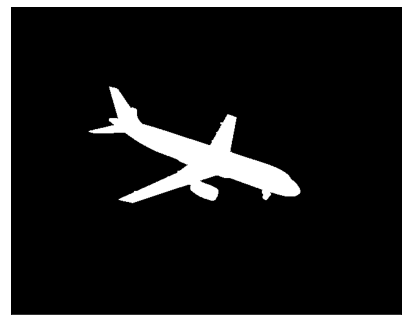

In [287]:
not_gray_res = cv.bitwise_not(gray_res)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(not_gray_res, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc410d4c8>,
 <matplotlib.collections.PathCollection at 0x14dc412a808>)

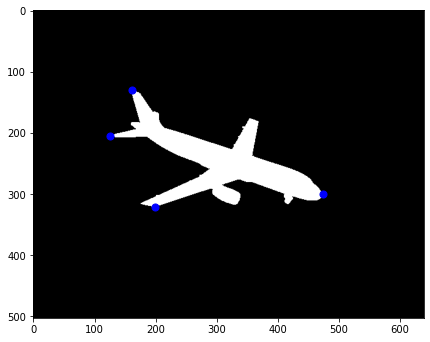

In [288]:
cnt = contours[1]

ext_left = tuple(cnt[cnt[:,:,0].argmin()][0])
ext_right = tuple(cnt[cnt[:,:,0].argmax()][0])
ext_top = tuple(cnt[cnt[:,:,1].argmin()][0])
ext_bottom = tuple(cnt[cnt[:,:,1].argmax()][0])

extremes = [ext_left, ext_right, ext_top, ext_bottom]
x_coord = [p[0] for p in extremes]
y_coord = [p[1] for p in extremes]

# View on Matplotlib
#recolor_not_gray_res = cv.cvtColor(not_gray_res, cv.COLOR_GRAY2RGB)
plt.figure(figsize=(7,6))
plt.imshow(not_gray_res, cmap='gray'), plt.scatter(x_coord, y_coord, c='b', s=50)

And let's try another example, a banana

(<matplotlib.image.AxesImage at 0x14dc418f588>, ([], []), ([], []))

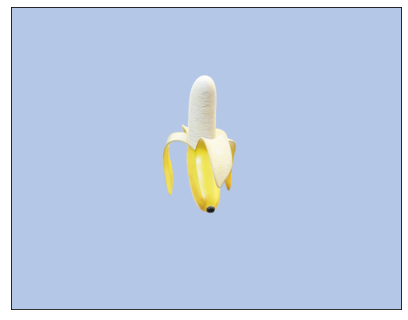

In [289]:
img = cv.imread('bank_images/test15.png')

# View on Matplotlin
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(7,6))
plt.imshow(rgb_img), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc41e9888>, ([], []), ([], []))

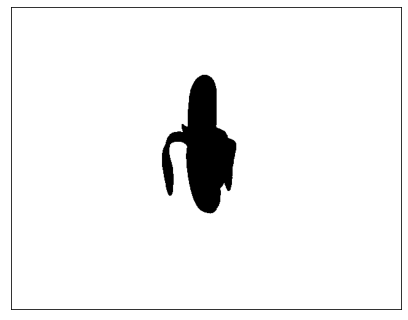

In [290]:
# Track blue background
lower_end = np.array([[[231, 199, 180]]])
upper_end = np.array([[[231, 199, 180]]])

mask = cv.inRange(img, lower_end, upper_end)
res = cv.bitwise_and(img,img, mask= mask)

# Convert to binary image
gray_res = cv.cvtColor(res, cv.COLOR_BGR2GRAY)
# Threshold
ret,thresh = cv.threshold(gray_res, 127, 255, 0)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(gray_res, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc5207708>, ([], []), ([], []))

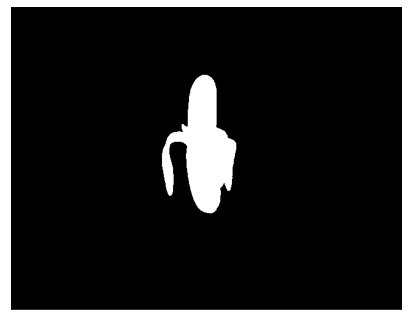

In [291]:
# Invert
not_gray_res = cv.bitwise_not(gray_res)

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(not_gray_res, cmap='gray'), plt.xticks([]), plt.yticks([])

(<matplotlib.image.AxesImage at 0x14dc525cd48>,
 <matplotlib.collections.PathCollection at 0x14dc521c588>)

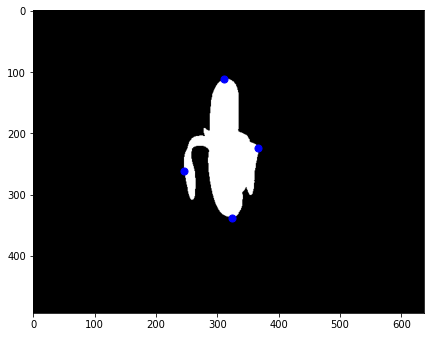

In [292]:
contours,hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cnt = contours[1] # The banana is the second element in contours

ext_left = tuple(cnt[cnt[:,:,0].argmin()][0])
ext_right = tuple(cnt[cnt[:,:,0].argmax()][0])
ext_top = tuple(cnt[cnt[:,:,1].argmin()][0])
ext_bottom = tuple(cnt[cnt[:,:,1].argmax()][0])

extremes = [ext_left, ext_right, ext_top, ext_bottom]
x_coord = [p[0] for p in extremes]
y_coord = [p[1] for p in extremes]

# View on Matplotlib
plt.figure(figsize=(7,6))
plt.imshow(not_gray_res, cmap='gray'), plt.scatter(x_coord, y_coord, c='b', s=50)

For other properties, see https://docs.opencv.org/3.4/d1/d32/tutorial_py_contour_properties.html